In [202]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA

## 1.1

In [203]:
%env OMP_NUM_THREADS=1

env: OMP_NUM_THREADS=1


In [204]:
X = np.array([[5,   3],
              [10, 15],
              [15, 12],
              [24, 10],
              [30, 45],
              [85, 70],
              [71, 80],
              [60, 78],
              [55, 52],
              [80, 91]])

In [205]:
k_values = range(2, 6)
inertias = []

In [206]:
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)

c:\Users\pyramidheadshark\anaconda3\envs\DS-Practive-Sem1\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\pyramidheadshark\anaconda3\envs\DS-Practive-Sem1\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\pyramidheadshark\anaconda3\envs\DS-Practive-Sem1\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\pyramidheadshark\anaconda3\e

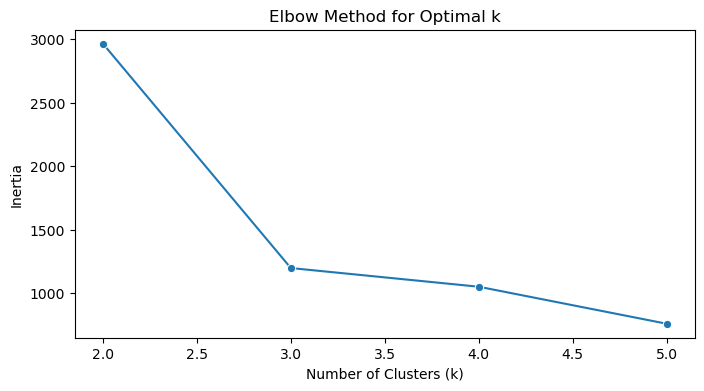

In [207]:
plt.figure(figsize=(8, 4))
sns.lineplot(x=k_values, y=inertias, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()

c:\Users\pyramidheadshark\anaconda3\envs\DS-Practive-Sem1\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


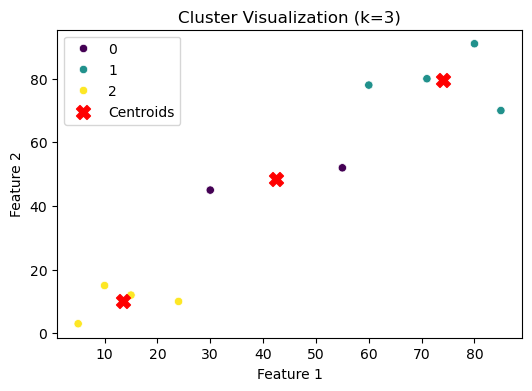

In [208]:
k_chosen = 3

kmeans = KMeans(n_clusters=k_chosen, random_state=42)
kmeans.fit(X)
labels = kmeans.labels_

plt.figure(figsize=(6, 4))
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=labels, palette='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='red', marker='X', label='Centroids')
plt.title(f'Cluster Visualization (k={k_chosen})')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

## 1.2

In [209]:
iris = load_iris()
X = iris.data

In [210]:
k_values = range(2, 6)
inertias = []

In [211]:
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)

c:\Users\pyramidheadshark\anaconda3\envs\DS-Practive-Sem1\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\pyramidheadshark\anaconda3\envs\DS-Practive-Sem1\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\pyramidheadshark\anaconda3\envs\DS-Practive-Sem1\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\pyramidheadshark\anaconda3\e

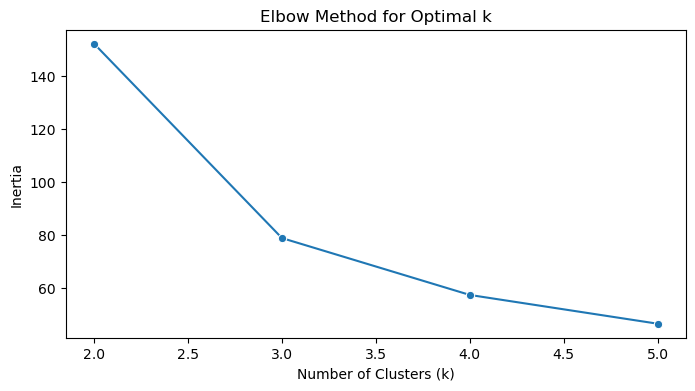

In [212]:
plt.figure(figsize=(8, 4))
sns.lineplot(x=k_values, y=inertias, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()

c:\Users\pyramidheadshark\anaconda3\envs\DS-Practive-Sem1\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


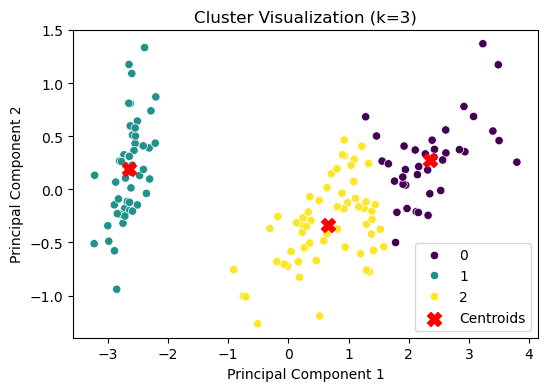

In [213]:
k_chosen = 3

kmeans = KMeans(n_clusters=k_chosen, random_state=42)
kmeans.fit(X)
labels = kmeans.labels_
predictions = kmeans.predict(X)

pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)

plt.figure(figsize=(6, 4))
sns.scatterplot(x=X_reduced[:, 0], y=X_reduced[:, 1], hue=labels, palette='viridis')
plt.scatter(pca.transform(kmeans.cluster_centers_)[:, 0], pca.transform(kmeans.cluster_centers_)[:, 1], s=100, c='red', marker='X', label='Centroids')
plt.title(f'Cluster Visualization (k={k_chosen})')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

## 1.3

In [214]:
X = iris.data
y = iris.target

In [215]:
X_selected = X[:, [0, 2]]

In [216]:
linked = linkage(X_selected, 'ward')

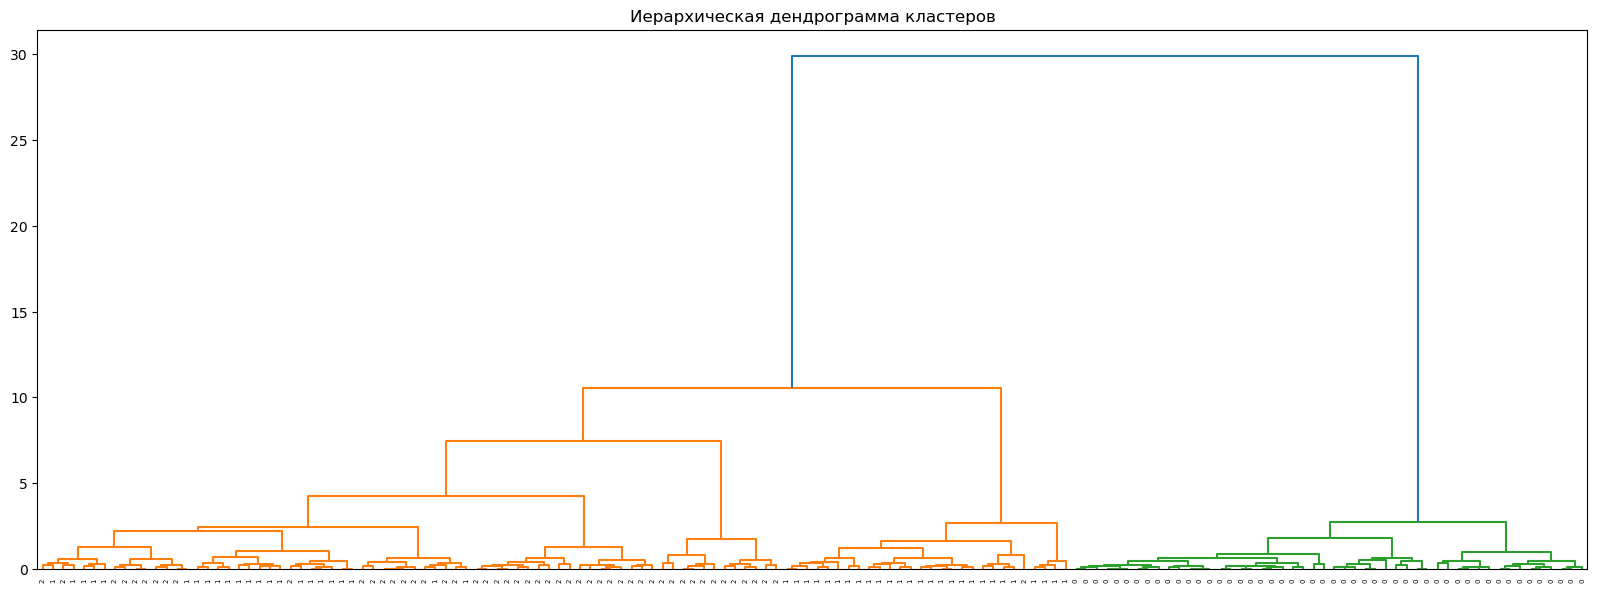

In [220]:
plt.figure(figsize=(20, 7))
dendrogram(linked,
            orientation='top',
            labels=y,
            distance_sort='descending',
            show_leaf_counts=True)
plt.title('Иерархическая дендрограмма кластеров')

plt.show()

In [218]:
df = pd.DataFrame(X_selected, columns=['Sepal Length', 'Petal Length'])
df['Species'] = iris.target_names[y]
df['Cluster'] = fcluster(linked, t=3, criterion='maxclust')

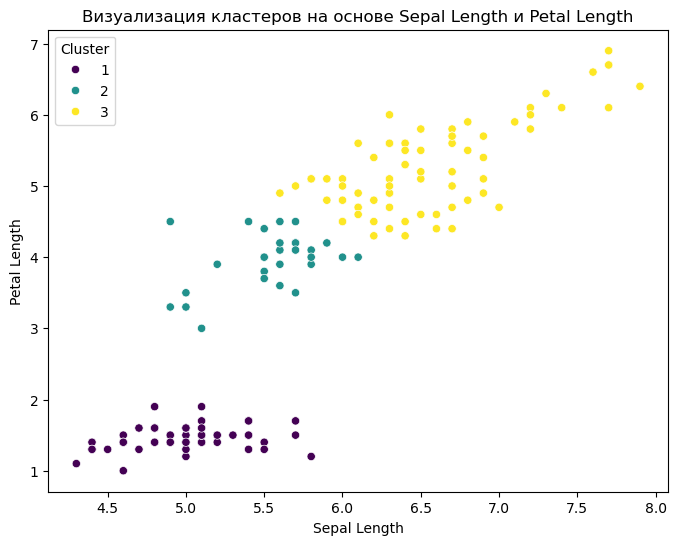

In [219]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Sepal Length', y='Petal Length', hue='Cluster', palette='viridis')
plt.title('Визуализация кластеров на основе Sepal Length и Petal Length')
plt.show()